# Non-Analytical Data Processing

NOTE 1: Dataset was pulled from the website below on 12/15/24. The dataset may have been updated with additional matches since as there have been competitive games added since Worlds 2024 concluded.
https://oracleselixir.com/tools/downloads

The dataset I am working with contains observations of both individual and team-wide statistics.

NOTE 2: I have redundant import statements because I worked on different sections of this document at different time periods.

## Remove individual data observations

In [ ]:
import pandas as pd

def filter_team_data(df):
    # Filter for rows where position is 'team'
    team_data = df[df['position'] == 'team'].copy()
    
    # Reset the index after filtering
    team_data.reset_index(drop=True, inplace=True)
    
    # Print some basic information about the filtering
    print(f"Original number of rows: {len(df)}")
    print(f"Number of rows after filtering: {len(team_data)}")
    print(f"Removed {len(df) - len(team_data)} player-level observations")
    
    return team_data

# Read the input CSV file
input_file = '2024_LoL_esports_match_data_from_OraclesElixir.csv'
output_file = 'Team_data_2024_LoL_esports.csv'

print(f"Reading data from {input_file}...")
df = pd.read_csv(input_file)

# Filter the data
team_data = filter_team_data(df)

# Save the filtered data to a new CSV file
team_data.to_csv(output_file, index=False)


## Remove incomplete observations from data

In [ ]:
import pandas as pd

def filter_team_data(df):
    # Filter for rows with 'complete' data
    team_data = df[df['datacompleteness'] == 'complete'].copy()
    
    # Reset the index after filtering
    team_data.reset_index(drop=True, inplace=True)
    
    # Print some basic information about the filtering
    print(f"Original number of rows: {len(df)}")
    print(f"Number of rows after filtering: {len(team_data)}")
    print(f"Removed {len(df) - len(team_data)} player-level observations")
    
    return team_data

# Read the input CSV file
input_file = 'Team_data_2024_LoL_esports.csv'
output_file = 'complete_team_data_2024_LoL_esports.csv'

# Read the data
df = pd.read_csv(input_file)

# Filter the data
team_data = filter_team_data(df)

# Save the filtered data to a new CSV file
team_data.to_csv(output_file, index=False)

## Filter for relevant team-wide statistics before doing a proper EDA

In [ ]:
import pandas as pd

def filter_team_features(df):
    columns_to_keep = [
        # Game id information
        'gameid', 'league', 'year', 'split', 'playoffs', 'date', 'patch', 'teamname',
        
        # Basic game info
        'side', 'result', 'gamelength',
        
        # Teamfight metrics
        'teamkills', 'teamdeaths', 'team kpm', 'ckpm',
        
        # Game Objectives
        # Dragons
        'firstdragon', 'dragons', 'opp_dragons', 'elders', 'opp_elders',
        # Heralds
        'firstherald', 'heralds', 'opp_heralds',
        # Grubbies
        'void_grubs', 'opp_void_grubs',
        # Baron
        'firstbaron', 'barons', 'opp_barons',
        # Towers
        'turretplates', 'opp_turretplates', 'firsttower', 'firstmidtower', 'firsttothreetowers', 'towers', 'opp_towers',
        # Inhibs
        'inhibitors', 'opp_inhibitors',
        
        # Damage Metrics
        'damagetochampions', 'dpm',
        'damagetakenperminute', 'damagemitigatedperminute',
        
        # Game Economy
        'totalgold', 'goldspent', 'gspd', 'gpr',
        'goldat10', 'goldat15', 'goldat20', 'goldat25',
        'golddiffat10', 'golddiffat15', 'golddiffat20', 'golddiffat25',
        
        # Vision control
        'wardsplaced', 'wardskilled', 'visionscore',
        'controlwardsbought', 'wpm', 'wcpm', 'vspm',
        
        # Action metrics
        'killsat10', 'killsat15', 'killsat20', 'killsat25',
        'deathsat10', 'deathsat15', 'deathsat20', 'deathsat25'
    ]
    
    # Filter for team positions first
    team_data = df[df['position'] == 'team'].copy()
    
    # Keep only specified columns
    team_data = team_data[columns_to_keep]
    
    # Reset the index after filtering
    team_data.reset_index(drop=True, inplace=True)
    
    # Print information about the filtering
    print(f"Original number of rows: {len(df)}")
    print(f"Number of rows after filtering: {len(team_data)}")
    print(f"Number of columns kept: {len(columns_to_keep)}")
    
    return team_data

# Read the input CSV file
input_file = 'complete_team_data_2024_LoL_esports.csv'
output_file = 'team_metrics_data_2024_LoL_esports.csv'

# Read and process the data
df = pd.read_csv(input_file)
team_data = filter_team_features(df)

# Save the filtered data
team_data.to_csv(output_file, index=False)

## Pre-Analytical Data Processing Done

Now that I have a dataset only looking at team-wide metrics, I can move onto the EDA portion of data analysis.

Below is my initial heatmap analysis of the data. With such a large number of features, it is hard to pair it down. As such, I am trying other feature reduction techniques.

## Heatmap

Number of metrics analyzed: 59


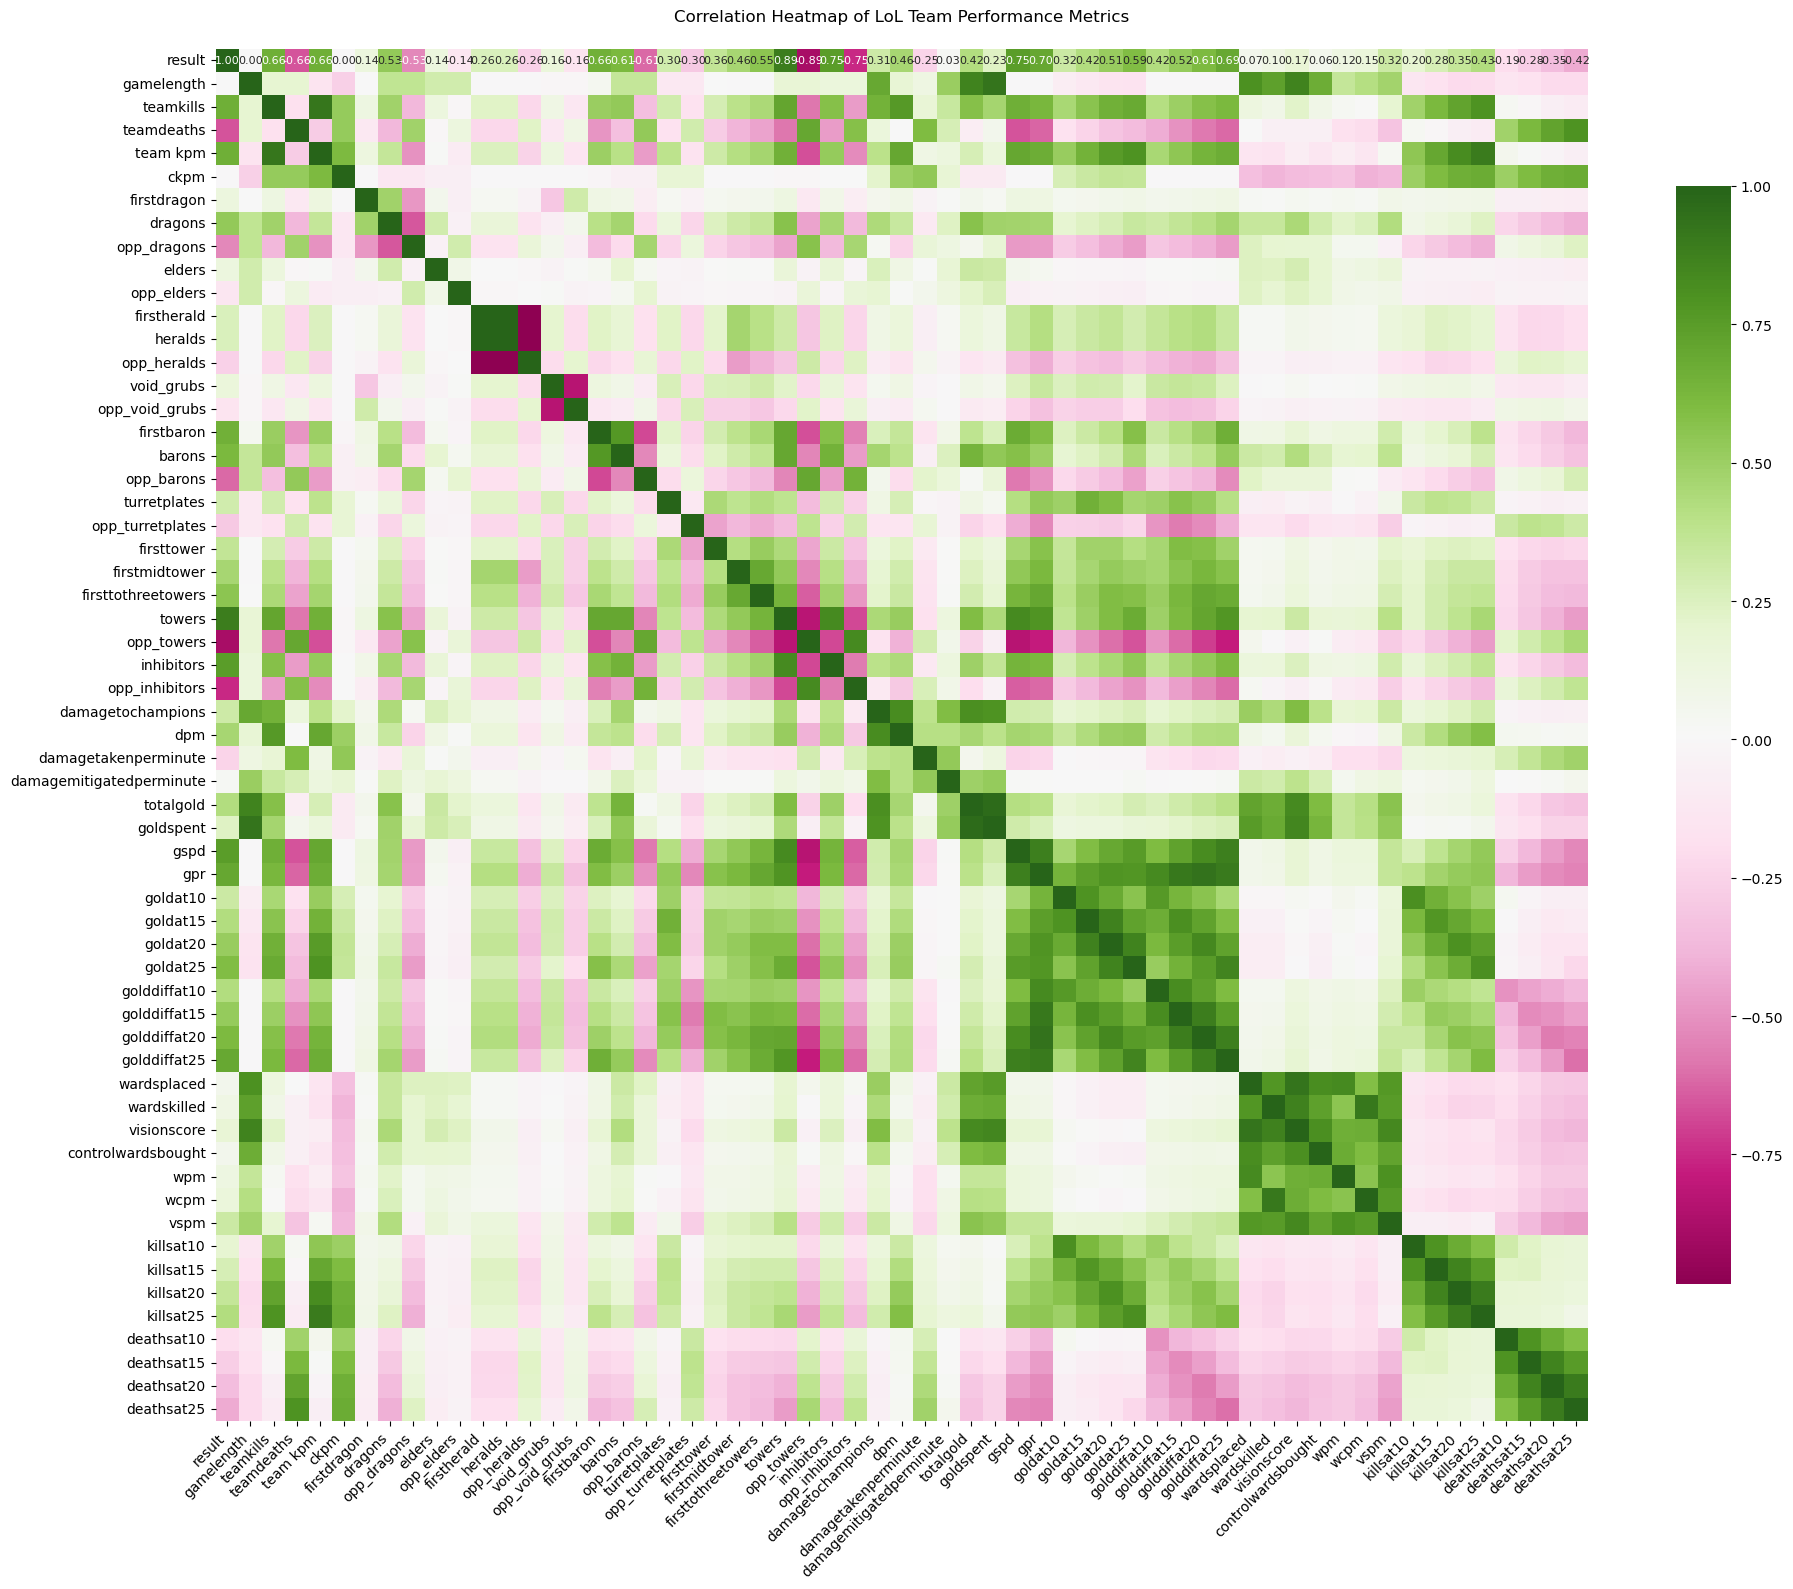

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_correlation_heatmap(df):
    # Exclude game id columns
    exclude_columns = [
        'gameid', 'league', 'year', 'split', 'playoffs', 
        'date', 'patch', 'teamname', 'side'
    ]
    
    # Select numeric columns and exclude ID columns
    analysis_df = df.drop(columns=exclude_columns, errors='ignore')
    numeric_df = analysis_df.select_dtypes(include=['int64', 'float64'])
    
    correlation_matrix = numeric_df.corr()
    
    plt.figure(figsize=(20, 16))
    
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='PiYG', # Pink Green
                fmt=".2f",  # Round to 2 decimal places
                square=True,
                cbar_kws={'shrink': .8},
                annot_kws={'size': 8},  # Smaller font size for annotations
                )
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.title('Correlation Heatmap of LoL Team Performance Metrics', pad=20)
    
    plt.tight_layout()
    
    print(f"Number of metrics analyzed: {len(numeric_df.columns)}")
    
    return plt

input_file = 'team_metrics_data_2024_LoL_esports.csv'
team_data = pd.read_csv(input_file)
plt = create_correlation_heatmap(team_data)
plt.show()

## PCA & Permutation Test

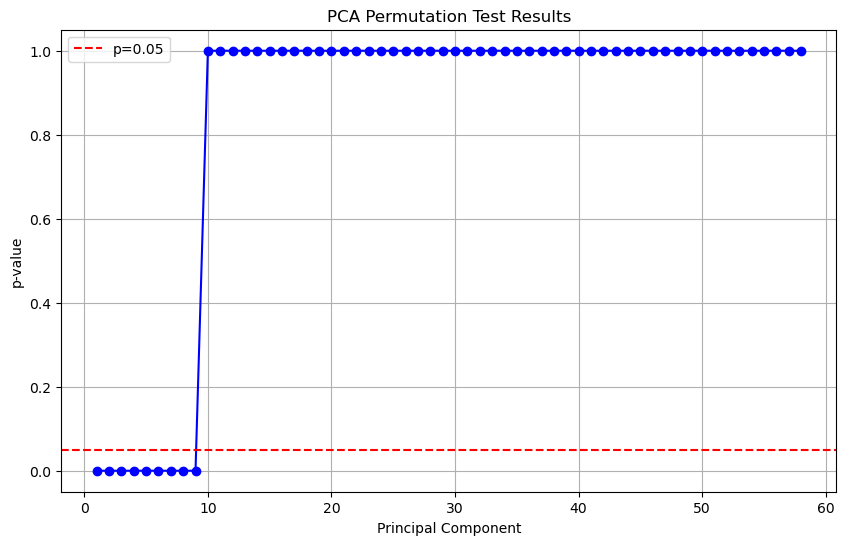


Number of significant components: 9
Variance explained by significant components: 0.784


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

np.random.seed(5)

# Read data
data = pd.read_csv('team_metrics_data_2024_LoL_esports.csv')
# Store results column for later insert into the pca file
results = data['result']

# Exclude game id and result columns
exclude_columns = ['gameid', 'league', 'year', 'split', 'playoffs', 
                'date', 'patch', 'teamname', 'side', 'result']
data = data.drop(columns=exclude_columns)

# Fill missing cells with the column's mean
data = data.fillna(data.mean())

# Scale the data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Function to shuffle each column
def shuffle_columns(df):
    shuffled = df.copy()
    for col in df.columns:
        shuffled[col] = df[col].sample(len(df)).values
    return shuffled

# Create PCA object
pca = PCA()

# Do PCA on data
pca.fit(scaled_data)
real_variance = pca.explained_variance_ratio_

# Permutation Test


n_permutations = 1000
permuted_variance = np.zeros((n_permutations, len(scaled_data.columns)))

for i in range(n_permutations):
    shuffled_data = shuffle_columns(scaled_data)
    pca.fit(shuffled_data)
    permuted_variance[i,:] = pca.explained_variance_ratio_

# Calculate p-values
p_values = np.sum(permuted_variance > real_variance, axis=0) / n_permutations

# Plot results
plt.figure(figsize=(10,6))
plt.plot(range(1, len(p_values) + 1), p_values, 'bo-')
plt.axhline(y=0.05, color='r', linestyle='--', label='p=0.05')
plt.xlabel('Principal Component')
plt.ylabel('p-value')
plt.title('PCA Permutation Test Results')
plt.legend()
plt.grid(True)
plt.show()

# Print number of significant components
sig_components = sum(p_values < 0.05)
print(f"\nNumber of significant components: {sig_components}")

# Print variance explained by significant components
cumulative_var = np.cumsum(real_variance)
print(f"Variance explained by significant components: {cumulative_var[sig_components-1]:.3f}")


In [3]:
# Refit PCA on original data for final analysis
pca.fit(scaled_data)

# Show top 5 features per component
for i in range(9):
    # Get absolute loadings for this PC
    loadings = abs(pca.components_[i])
    # Get indices of top 5 features
    top_5 = loadings.argsort()[-5:][::-1]
    
    print(f"\nPC{i+1} top 5 features:")
    for idx in top_5:
        print(scaled_data.columns[idx])


PC1 top 5 features:
gpr
golddiffat20
gspd
towers
golddiffat25

PC2 top 5 features:
visionscore
wardsplaced
wardskilled
gamelength
controlwardsbought

PC3 top 5 features:
damagetochampions
teamdeaths
damagetakenperminute
ckpm
damagemitigatedperminute

PC4 top 5 features:
opp_void_grubs
void_grubs
heralds
firstherald
opp_heralds

PC5 top 5 features:
firstherald
heralds
opp_heralds
goldat10
wpm

PC6 top 5 features:
firstdragon
void_grubs
opp_void_grubs
opp_dragons
firstherald

PC7 top 5 features:
deathsat10
deathsat15
wpm
firstdragon
opp_barons

PC8 top 5 features:
firsttower
opp_dragons
firstdragon
opp_elders
dragons

PC9 top 5 features:
elders
damagetakenperminute
killsat10
opp_elders
dpm


In [ ]:
component_names = {
    'PC1': 'Gold_Advantage_and_Towers',
    'PC2': 'Vision_Control',
    'PC3': 'Teamfight_Metrics',
    'PC4': 'Grubs_and_Herald',
    'PC5': 'Herald_Control',
    'PC6': 'Monster_Objective_Control',
    'PC7': 'Laning_Phase_and_Early_Baron_Control',
    'PC8': 'Early_to_Late_Game_Objective_Sequence',
    'PC9': 'Late_Game_Elder_Teamfights'
}
# Get transformed data for first 9 components using the same PCA object. Get first 9 components
transformed_data = pca.transform(scaled_data)[:, :9]  

# Create dataframe with the results and named components
named_components = pd.DataFrame(
    transformed_data,
    columns=[component_names[f'PC{i+1}'] for i in range(9)]
)
named_components.insert(0, 'result', results)

# Save to CSV
named_components.to_csv('pca_transformed_data.csv', index=False)